# $\text{ARIMA}(p,d,q)$

ARIMA stands for Auto Regressive Integrated Moving Average. The intent of $\text{ARIMA}(p,d,q)$ is to construct a stationary, $\text{ARMA}(p,q)$</br>
time series from a non-stationary time series by differencing $d$ times. Recall that an $\text{ARMA}(p,q)$ process is defined by,

$
\begin{align}
X_t = \varepsilon_t + \sum_{i=1}^p \varphi_i X_{t-i} + \sum_{i=1}^q \vartheta_i \varepsilon_{t-i}
\end{align}
$

In terms of the lag operator $L X_t = X_{t-1}, L^2 X_t = X_{t-2}, L^3 X_t = X_{t-3}, \ldots$, The $\text{ARMA}(p,q)$ model can be written as,

$
\begin{align}
\left( 1 - \sum_{i=1}^p \varphi_i L^i \right) X_t = \left( 1  + \sum_{i=1}^q \vartheta_i L^i \right)\varepsilon_{t}
\end{align}
$

The difference operator is given by $\Delta = (1 - L)$. If $X_t$ is stationary after $d$ differences it follows that $\left( 1 - L \right)^d X_t$ is stationary. This is the definition of integration order.</br> 
Thus, $\text{ARIMA}(p,d,q)$ can be written as,

$
\begin{align}
\left( 1 - \sum_{i=1}^p \varphi_i L^i \right) \left( 1 - L \right)^d X_t = \left( 1  + \sum_{i=1}^q \vartheta_i L^i \right)\varepsilon_{t}
\end{align}
$

The procedure followed to determine the order and coefficients of an $\text{ARIMA}(p,d,q)$ series is as follows.

1. Use ADF test to determine if series is stationary. To determine $d$ difference series until ADF test fails.
2. User PACF/ACF analysis to determine $p$ and $q$.
3. Perform regression on differenced series to determine coefficients.

## Includes

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import config
from lib import (Func, Source, Est, Test, PlotType)
from lib import (stack, comparison)

# Config Plot Style
pyplot.style.use(config.glyfish_style)

/Users/troy/.pyenv/versions/gly.fish.3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## $\text{ARIMA}(1,1,0)$ Example

In [2]:
nsample = 1000
σ = 1.0
nlags = 10

In [3]:
φ = [0.5]
d = 1
ar = Source.AR.create(φ=φ, npts=nsample)
arima = Source.ARIMA_FROM_ARMA.create(arma=ar, d=d, npts=nsample)
diff_1 = Func.DIFF.apply(arima, ndiff=1)

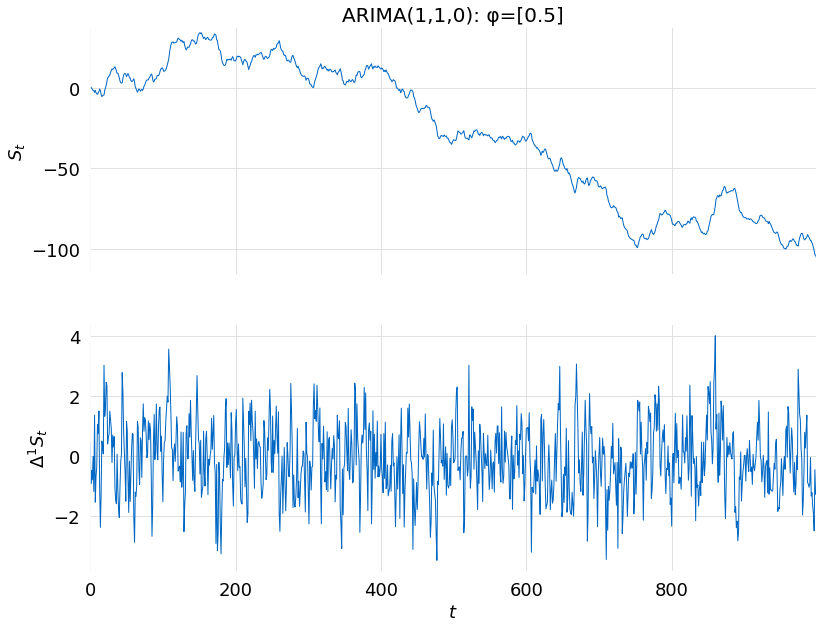

In [4]:
title=f"ARIMA(1,1,0): φ={φ}"
stack([arima, diff_1], title=title)

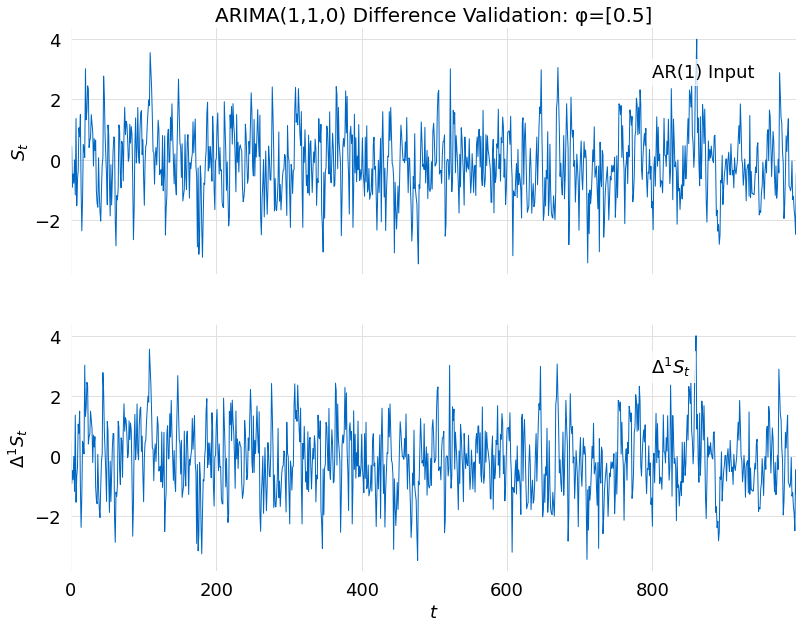

In [5]:
title = f"ARIMA(1,1,0) Difference Validation: φ={φ}"
stack([ar, diff_1], title=title, labels=[r"AR(1) Input", r"$\Delta^1 S_t$"])

In [6]:
result = Test.STATIONARITY.perform(arima)
result.summary()

╒════════════════╤════════════╕
│ Test Statistic │   1.15026  │
├────────────────┼────────────┤
│ pvalue         │   0.934932 │
├────────────────┼────────────┤
│ Lags           │   1        │
├────────────────┼────────────┤
│ Number Obs     │ 998        │
╘════════════════╧════════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.56798 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94127 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61656 │ Passed   │
╘════════════════╧══════════════════╧══════════╛


In [7]:
arima.attrs

{'SourceType': None,
 'SourceName': None,
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '17/06/2022 12:20:54',
 'Type': <Source.ARIMA_FROM_ARMA: 'ARIMA_FROM_ARMA'>,
 'Name': 'ARIMA(p, 1, q)-Simulation-ae9143d5-31f1-4d91-90cb-321306b4cd8b',
 'SchemaIterations': None,
 'ARIMA_FROM_ARMA': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'d': 1},
  'Description': 'ARIMA(1) from ARMA',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {},
  'Tests': {'STATIONARITY': {'Status': False,
    'TestHypothesis': <TestHypothesis.LOWER_TAIL: 'LOWER_TAIL'>,
    'TestType': <Test.STATIONARITY: 'STATIONARITY'>,
    'ImplType': <_TestImpl.ADF: 'ADF'>,
    'Description': 'Stationarity Test',
    'Distribution': None,
    'Distribution Params': {},
    'TestData': [{'Status': True,
      'Statistic': {'Value': 1.1502560619651443, 'Label': '$t$'},
      'PValue': {'Value': 0.934931

In [8]:
result = Test.STATIONARITY.perform(diff_1)
result.summary()

╒════════════════╤═══════════════╕
│ Test Statistic │ -18.3525      │
├────────────────┼───────────────┤
│ pvalue         │   4.13344e-29 │
├────────────────┼───────────────┤
│ Lags           │   0           │
├────────────────┼───────────────┤
│ Number Obs     │ 998           │
╘════════════════╧═══════════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.56798 │ Failed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94127 │ Failed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61656 │ Failed   │
╘════════════════╧══════════════════╧══════════╛


In [9]:
diff_1.attrs

{'SourceType': <Source.ARIMA_FROM_ARMA: 'ARIMA_FROM_ARMA'>,
 'SourceName': 'ARIMA(p, 1, q)-Simulation-ae9143d5-31f1-4d91-90cb-321306b4cd8b',
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '17/06/2022 12:20:54',
 'Type': <Func.DIFF: 'DIFF'>,
 'Name': 'TIME_SERIES-73e90506-a99f-47f2-b728-e7ebf86370d1',
 'SchemaIterations': None,
 'ARIMA_FROM_ARMA': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'d': 1},
  'Description': 'ARIMA(1) from ARMA',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {},
  'Tests': {}},
 'DIFF': {'npts': 999,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'ndiff': 1},
  'Description': 'Difference',
  'ylabel': '$\\Delta^{1} S_t$',
  'xlabel': '$t$',
  'SourceSchema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
  'Formula': None,
  'Estimates': {},
  'Tests': {'STATIONARITY': {'Status': True,

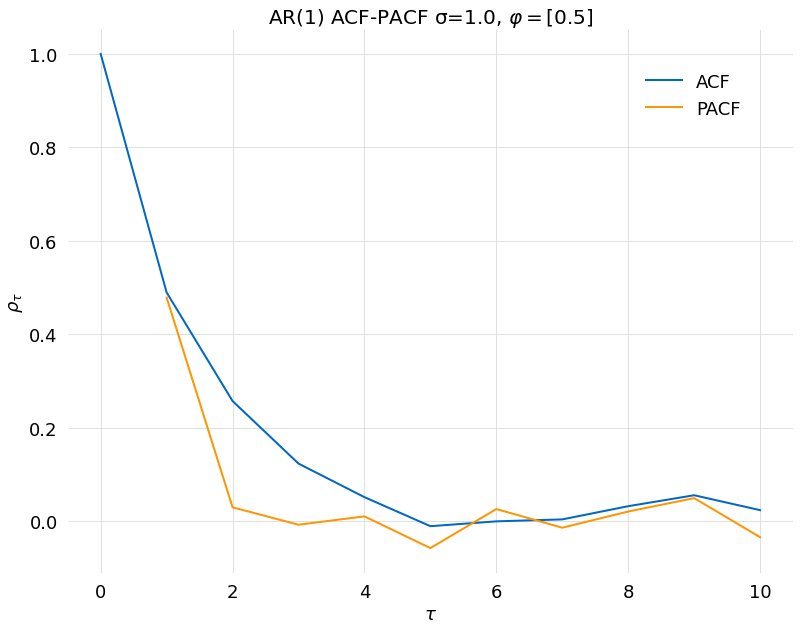

In [10]:
acf = Func.ACF.apply(diff_1, nlags=nlags)
pacf = Func.PACF.apply(diff_1, nlags=nlags)
title = f"AR(1) ACF-PACF σ={σ}, " + r"$\varphi=$"+f"{φ}"
comparison([acf, pacf], title=title, labels=["ACF", "PACF"])

In [11]:
result = Est.AR.perform(diff_1, order=1)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                  999
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1426.573
Date:                Fri, 17 Jun 2022   AIC                           2859.146
Time:                        12:20:55   BIC                           2873.866
Sample:                             0   HQIC                          2864.741
                                - 999                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1060      0.063     -1.694      0.090      -0.229       0.017
ar.L1          0.4898      0.028     17.695      0.000       0.436       0.544
sigma2         1.0180      0.044     23.200      0.000       0.932       1.104
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                 1.07
Prob(Q):                              0.73   Prob(JB):                         0.59
Heteroskedasticity (H):               0.87   Skew:                             0.02
Prob(H) (two-sided):                  0.20   Kurtosis:                         3.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## $\text{ARIMA}(1,2,0)$ Example

In [12]:
φ = [0.75]
d = 2
ar = Source.AR.create(φ=φ, npts=nsample)
arima = Source.ARIMA_FROM_ARMA.create(arma=ar, d=d, npts=nsample)
diff_1 = Func.DIFF.apply(arima, ndiff=1)
diff_2 = Func.DIFF.apply(arima, ndiff=2)

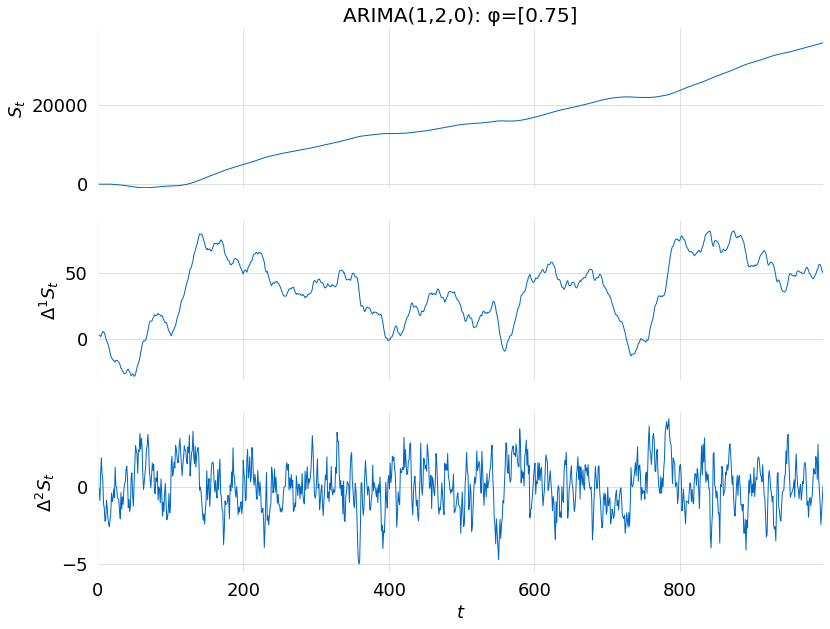

In [13]:
title = f"ARIMA(1,2,0): φ={φ}"
stack([arima, diff_1, diff_2], title=title)

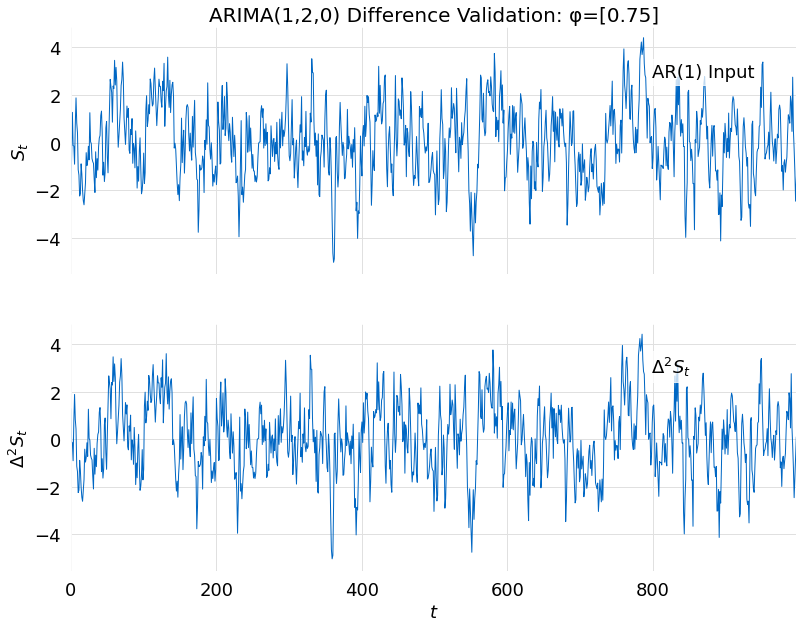

In [14]:
title = f"ARIMA(1,2,0) Difference Validation: φ={φ}"
stack([ar, diff_2], title=title, labels=[r"AR(1) Input", r"$\Delta^2 S_t$"])

In [15]:
result = Test.STATIONARITY.perform(arima)
result.summary()

╒════════════════╤═══════════╕
│ Test Statistic │   1.75775 │
├────────────────┼───────────┤
│ pvalue         │   0.98158 │
├────────────────┼───────────┤
│ Lags           │  15       │
├────────────────┼───────────┤
│ Number Obs     │ 984       │
╘════════════════╧═══════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.56802 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94128 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61655 │ Passed   │
╘════════════════╧══════════════════╧══════════╛


In [16]:
arima.attrs

{'SourceType': None,
 'SourceName': None,
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '17/06/2022 12:20:55',
 'Type': <Source.ARIMA_FROM_ARMA: 'ARIMA_FROM_ARMA'>,
 'Name': 'ARIMA(p, 2, q)-Simulation-bd6a535c-7feb-4de0-becb-e5641412b64d',
 'SchemaIterations': None,
 'ARIMA_FROM_ARMA': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'d': 2},
  'Description': 'ARIMA(2) from ARMA',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {},
  'Tests': {'STATIONARITY': {'Status': False,
    'TestHypothesis': <TestHypothesis.LOWER_TAIL: 'LOWER_TAIL'>,
    'TestType': <Test.STATIONARITY: 'STATIONARITY'>,
    'ImplType': <_TestImpl.ADF: 'ADF'>,
    'Description': 'Stationarity Test',
    'Distribution': None,
    'Distribution Params': {},
    'TestData': [{'Status': True,
      'Statistic': {'Value': 1.757746129116803, 'Label': '$t$'},
      'PValue': {'Value': 0.9815796

In [17]:
result = Test.STATIONARITY.perform(diff_1)
result.summary()

╒════════════════╤════════════╕
│ Test Statistic │  -1.30563  │
├────────────────┼────────────┤
│ pvalue         │   0.177141 │
├────────────────┼────────────┤
│ Lags           │   4        │
├────────────────┼────────────┤
│ Number Obs     │ 994        │
╘════════════════╧════════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.56799 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94127 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61656 │ Passed   │
╘════════════════╧══════════════════╧══════════╛


In [18]:
diff_1.attrs

{'SourceType': <Source.ARIMA_FROM_ARMA: 'ARIMA_FROM_ARMA'>,
 'SourceName': 'ARIMA(p, 2, q)-Simulation-bd6a535c-7feb-4de0-becb-e5641412b64d',
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '17/06/2022 12:20:55',
 'Type': <Func.DIFF: 'DIFF'>,
 'Name': 'TIME_SERIES-ea21b22a-6ab5-4197-bc68-8ac6181afd2f',
 'SchemaIterations': None,
 'ARIMA_FROM_ARMA': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'d': 2},
  'Description': 'ARIMA(2) from ARMA',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {},
  'Tests': {}},
 'DIFF': {'npts': 999,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'ndiff': 1},
  'Description': 'Difference',
  'ylabel': '$\\Delta^{1} S_t$',
  'xlabel': '$t$',
  'SourceSchema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
  'Formula': None,
  'Estimates': {},
  'Tests': {'STATIONARITY': {'Status': False

In [19]:
result = Test.STATIONARITY.perform(diff_2)
result.summary()

╒════════════════╤═══════════════╕
│ Test Statistic │  -6.74862     │
├────────────────┼───────────────┤
│ pvalue         │   2.20124e-10 │
├────────────────┼───────────────┤
│ Lags           │  13           │
├────────────────┼───────────────┤
│ Number Obs     │ 984           │
╘════════════════╧═══════════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.56802 │ Failed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94128 │ Failed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61655 │ Failed   │
╘════════════════╧══════════════════╧══════════╛


In [20]:
diff_2.attrs

{'SourceType': <Source.ARIMA_FROM_ARMA: 'ARIMA_FROM_ARMA'>,
 'SourceName': 'ARIMA(p, 2, q)-Simulation-bd6a535c-7feb-4de0-becb-e5641412b64d',
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '17/06/2022 12:20:55',
 'Type': <Func.DIFF: 'DIFF'>,
 'Name': 'TIME_SERIES-1caf1733-7ddd-4c00-898b-00b1eb7ce41e',
 'SchemaIterations': None,
 'ARIMA_FROM_ARMA': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'d': 2},
  'Description': 'ARIMA(2) from ARMA',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {},
  'Tests': {}},
 'DIFF': {'npts': 998,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'ndiff': 2},
  'Description': 'Difference',
  'ylabel': '$\\Delta^{2} S_t$',
  'xlabel': '$t$',
  'SourceSchema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
  'Formula': None,
  'Estimates': {},
  'Tests': {'STATIONARITY': {'Status': True,

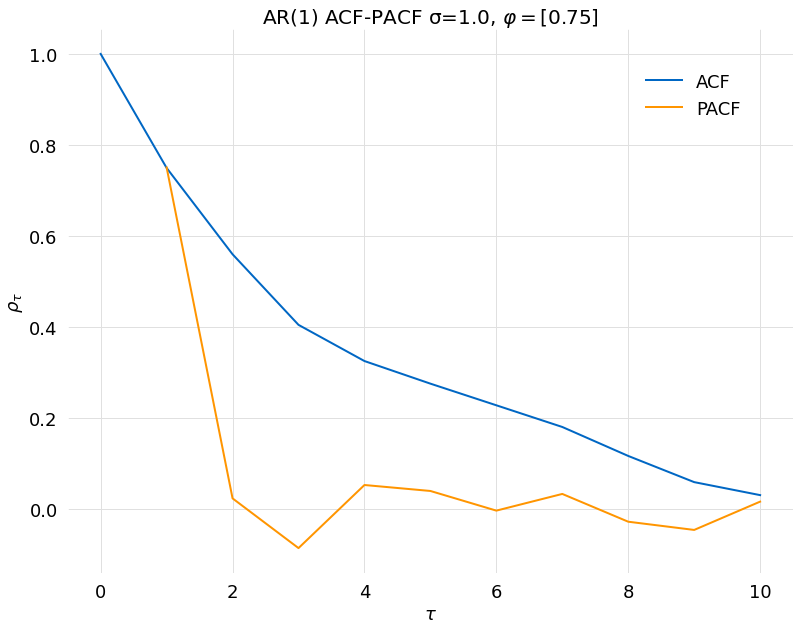

In [21]:
acf = Func.ACF.apply(diff_2, nlags=nlags)
pacf = Func.PACF.apply(diff_2, nlags=nlags)
title = f"AR(1) ACF-PACF σ={σ}, " + r"$\varphi=$"+f"{φ}"
comparison([acf, pacf], title=title, labels=["ACF", "PACF"])

In [22]:
result = Est.AR.perform(diff_2, order=1)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                  998
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1428.378
Date:                Fri, 17 Jun 2022   AIC                           2862.756
Time:                        12:20:57   BIC                           2877.473
Sample:                             0   HQIC                          2868.350
                                - 998                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0521      0.128      0.408      0.683      -0.198       0.302
ar.L1          0.7490      0.021     36.191      0.000       0.708       0.790
sigma2         1.0240      0.047     21.897      0.000       0.932       1.116
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.42
Prob(Q):                              0.90   Prob(JB):                         0.81
Heteroskedasticity (H):               1.00   Skew:                             0.03
Prob(H) (two-sided):                  0.97   Kurtosis:                         2.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## $\text{ARIMA}(2,2,0)$ Example

In [23]:
φ = [0.25, 0.4]
d = 2
ar = Source.AR.create(φ=φ, npts=nsample)
arima = Source.ARIMA_FROM_ARMA.create(arma=ar, d=d, npts=nsample)
diff_1 = Func.DIFF.apply(arima, ndiff=1)
diff_2 = Func.DIFF.apply(arima, ndiff=2)

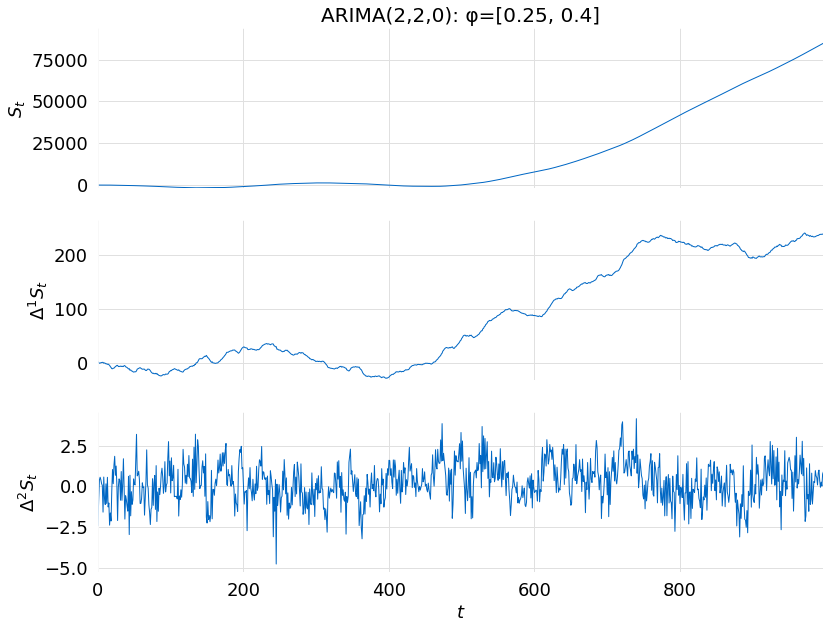

In [24]:
title = f"ARIMA(2,2,0): φ={φ}"
stack([arima, diff_1, diff_2], title=title)

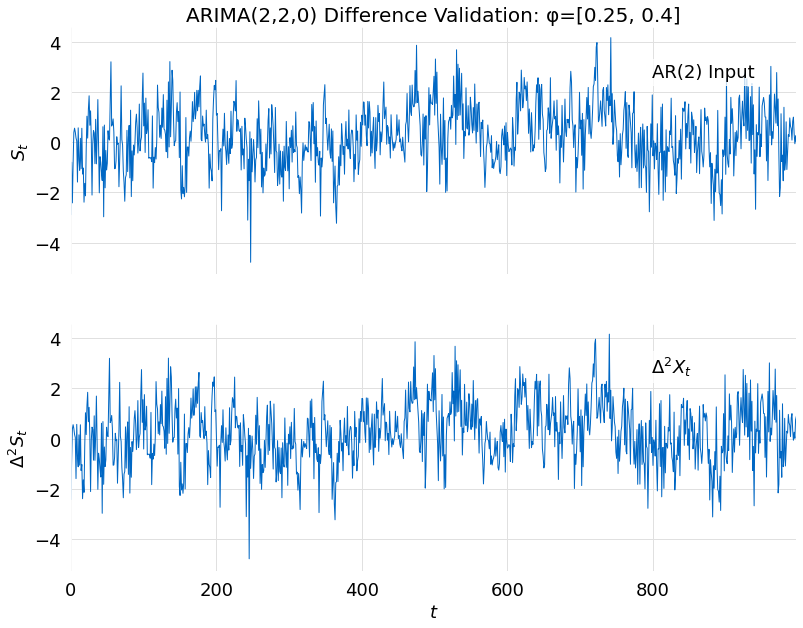

In [25]:
title = f"ARIMA(2,2,0) Difference Validation: φ={φ}"
stack([ar, diff_2], title=title, labels=[r"AR(2) Input", r"$\Delta^2 X_t$"])

In [26]:
result = Test.STATIONARITY.perform(arima)
result.summary()

╒════════════════╤════════════╕
│ Test Statistic │  -1.34337  │
├────────────────┼────────────┤
│ pvalue         │   0.166077 │
├────────────────┼────────────┤
│ Lags           │   3        │
├────────────────┼────────────┤
│ Number Obs     │ 996        │
╘════════════════╧════════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.56799 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94127 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61656 │ Passed   │
╘════════════════╧══════════════════╧══════════╛


In [27]:
arima.attrs

{'SourceType': None,
 'SourceName': None,
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '17/06/2022 12:20:57',
 'Type': <Source.ARIMA_FROM_ARMA: 'ARIMA_FROM_ARMA'>,
 'Name': 'ARIMA(p, 2, q)-Simulation-1c70a58e-64ce-40c1-bfd5-4d054c723737',
 'SchemaIterations': None,
 'ARIMA_FROM_ARMA': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'d': 2},
  'Description': 'ARIMA(2) from ARMA',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {},
  'Tests': {'STATIONARITY': {'Status': False,
    'TestHypothesis': <TestHypothesis.LOWER_TAIL: 'LOWER_TAIL'>,
    'TestType': <Test.STATIONARITY: 'STATIONARITY'>,
    'ImplType': <_TestImpl.ADF: 'ADF'>,
    'Description': 'Stationarity Test',
    'Distribution': None,
    'Distribution Params': {},
    'TestData': [{'Status': True,
      'Statistic': {'Value': -1.3433735021510447, 'Label': '$t$'},
      'PValue': {'Value': 0.16607

In [28]:
result = Test.STATIONARITY.perform(diff_1)
result.summary()

╒════════════════╤════════════╕
│ Test Statistic │   2.12544  │
├────────────────┼────────────┤
│ pvalue         │   0.993235 │
├────────────────┼────────────┤
│ Lags           │   2        │
├────────────────┼────────────┤
│ Number Obs     │ 996        │
╘════════════════╧════════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.56799 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94127 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61656 │ Passed   │
╘════════════════╧══════════════════╧══════════╛


In [29]:
diff_1.attrs

{'SourceType': <Source.ARIMA_FROM_ARMA: 'ARIMA_FROM_ARMA'>,
 'SourceName': 'ARIMA(p, 2, q)-Simulation-1c70a58e-64ce-40c1-bfd5-4d054c723737',
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '17/06/2022 12:20:57',
 'Type': <Func.DIFF: 'DIFF'>,
 'Name': 'TIME_SERIES-5e89b043-f599-4bad-a5f6-a4c9087992d9',
 'SchemaIterations': None,
 'ARIMA_FROM_ARMA': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'d': 2},
  'Description': 'ARIMA(2) from ARMA',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {},
  'Tests': {}},
 'DIFF': {'npts': 999,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'ndiff': 1},
  'Description': 'Difference',
  'ylabel': '$\\Delta^{1} S_t$',
  'xlabel': '$t$',
  'SourceSchema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
  'Formula': None,
  'Estimates': {},
  'Tests': {'STATIONARITY': {'Status': False

In [30]:
result = Test.STATIONARITY.perform(diff_2)
result.summary()

╒════════════════╤═══════════════╕
│ Test Statistic │  -8.35077     │
├────────────────┼───────────────┤
│ pvalue         │   5.18657e-14 │
├────────────────┼───────────────┤
│ Lags           │   4           │
├────────────────┼───────────────┤
│ Number Obs     │ 993           │
╘════════════════╧═══════════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.568   │ Failed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94127 │ Failed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61656 │ Failed   │
╘════════════════╧══════════════════╧══════════╛


In [31]:
diff_2.attrs

{'SourceType': <Source.ARIMA_FROM_ARMA: 'ARIMA_FROM_ARMA'>,
 'SourceName': 'ARIMA(p, 2, q)-Simulation-1c70a58e-64ce-40c1-bfd5-4d054c723737',
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '17/06/2022 12:20:57',
 'Type': <Func.DIFF: 'DIFF'>,
 'Name': 'TIME_SERIES-2346c384-41b5-4eb2-8534-b5e930b3845e',
 'SchemaIterations': None,
 'ARIMA_FROM_ARMA': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'d': 2},
  'Description': 'ARIMA(2) from ARMA',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {},
  'Tests': {}},
 'DIFF': {'npts': 998,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'ndiff': 2},
  'Description': 'Difference',
  'ylabel': '$\\Delta^{2} S_t$',
  'xlabel': '$t$',
  'SourceSchema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
  'Formula': None,
  'Estimates': {},
  'Tests': {'STATIONARITY': {'Status': True,

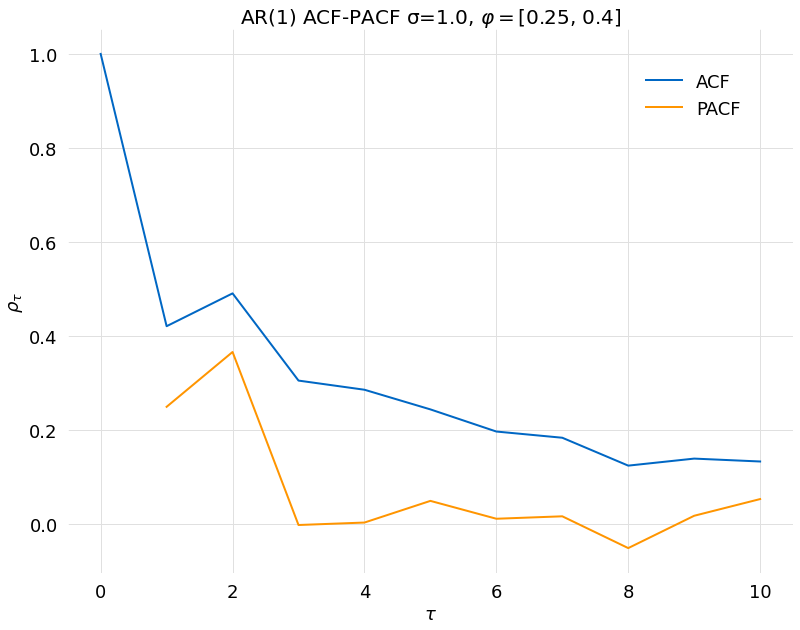

In [32]:
acf = Func.ACF.apply(diff_2, nlags=nlags)
pacf = Func.PACF.apply(diff_2, nlags=nlags)
title = f"AR(1) ACF-PACF σ={σ}, " + r"$\varphi=$"+f"{φ}"
comparison([acf, pacf], title=title, labels=["ACF", "PACF"])

In [33]:
result = Est.AR.perform(diff_2, order=2)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                  998
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1430.688
Date:                Fri, 17 Jun 2022   AIC                           2869.375
Time:                        12:20:58   BIC                           2888.998
Sample:                             0   HQIC                          2876.834
                                - 998                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2350      0.089      2.627      0.009       0.060       0.410
ar.L1          0.2611      0.030      8.578      0.000       0.201       0.321
ar.L2          0.3824      0.028     13.715      0.000       0.328       0.437
sigma2         1.0291      0.045     22.855      0.000       0.941       1.117
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                 1.84
Prob(Q):                              0.74   Prob(JB):                         0.40
Heteroskedasticity (H):               1.04   Skew:                            -0.08
Prob(H) (two-sided):                  0.74   Kurtosis:                         3.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""